In [1]:
import pandas as pd
import seaborn as sns

In [6]:
# Загружаем данные по поддтверждённым случаям заболевания
dfC = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
dfC

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,206702,206743,206788,206879,206912,206943,207037,207084,207146,207190
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333535,333567,333591,333613,333635,333635,333650,333653,333686,333708
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271147,271149,271156,271156,271156,271168,271174,271179,271182,271186
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47446,47446,47606,47606,47606,47606,47606,47606,47686,47686
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104808,104808,104946,104946,104946,104946,104946,104946,104946,104973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333746,333746,333746,333746,333746,333746,333746,333746,333746,333746


In [7]:
# Оставляем только Россию
dfC = dfC.loc[dfC['Country/Region'] == 'Russia']

# Убиаем не интересующие нас столбцы
dfC = dfC.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)

# Транспонируем датафрейм
dfCT = dfC.T
# Переименование столбца
dfCT = dfCT.rename(columns={221:"Количество заболевших"})
dfCT

,Количество заболевших
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
12/17/22,21401586
12/18/22,21408756
12/19/22,21415046
12/20/22,21420985


In [8]:
# отсекаем первые дни, где отсутствуют заболевших
dfCT = dfCT.loc[dfCT['Количество заболевших']>0]
dfCT

,Количество заболевших
1/31/20,2
2/1/20,2
2/2/20,2
2/3/20,2
2/4/20,2
...,...
12/17/22,21401586
12/18/22,21408756
12/19/22,21415046
12/20/22,21420985


In [9]:
# отсекаем первый месяц где было всего 2 заболевших (за весь месяц)
dfCT = dfCT.loc[dfCT['Количество заболевших']>2]
dfCT

,Количество заболевших
3/2/20,3
3/3/20,3
3/4/20,3
3/5/20,4
3/6/20,13
...,...
12/17/22,21401586
12/18/22,21408756
12/19/22,21415046
12/20/22,21420985


In [13]:
# Загружаем данные по умершим
dfD = pd.read_csv('data/time_series_covid19_deaths_global.csv')

# фильтруем оставляя только Россию
dfD = dfD.loc[dfD['Country/Region'] == 'Russia']

# убиаем не интересующие нас столбцы
dfD = dfD.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)

# транспонируем датафрейм
dfDT = dfD.T 
dfDT = dfDT.rename(columns={221:"Количество смертей"})

# делаем равным количество строк с количеством заболевших
dfDT = dfDT[40:]

In [14]:
# Загружаем данные поправившихся
dfR = pd.read_csv('data/time_series_covid19_recovered_global.csv')

# фильтруем оставляя только Россию
dfR = dfR.loc[dfR['Country/Region'] == 'Russia']

# убиаем не интересующие нас столбцы
dfR = dfR.drop(['Province/State', 'Country/Region','Lat','Long'], axis = 1)

# транспонируем датафрейм
dfRT = dfR.T 
dfRT = dfRT.rename(columns={206:"Количество поправившихся"})
dfRT = dfRT[40:]

In [15]:
s1 = pd.Series(dfDT['Количество смертей'])
s2 = pd.Series(dfRT['Количество поправившихся'])
df = pd.concat([dfCT, s1, s2], axis=1)
df

,Количество заболевших,Количество смертей,Количество поправившихся
3/2/20,3,0,2
3/3/20,3,0,2
3/4/20,3,0,2
3/5/20,4,0,2
3/6/20,13,0,2
...,...,...,...
12/17/22,21401586,385032,0
12/18/22,21408756,385083,0
12/19/22,21415046,385133,0
12/20/22,21420985,385189,0


<AxesSubplot:>

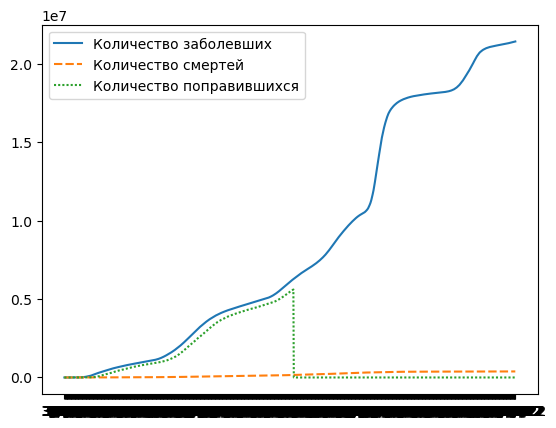

In [16]:
sns.lineplot(data=df[['Количество заболевших','Количество смертей', 'Количество поправившихся']])

In [20]:
# количество дней где были те, кто поправился
dfRT.loc[dfRT["Количество поправившихся"]>0]

,Количество поправившихся
3/2/20,2
3/3/20,2
3/4/20,2
3/5/20,2
3/6/20,2
...,...
7/31/21,5539787
8/1/21,5556831
8/2/21,5571532
8/3/21,5590137


In [21]:
# Убираем столбец с количеством поправившихся из рассмотрения
df = df.drop(['Количество поправившихся'], axis = 1)

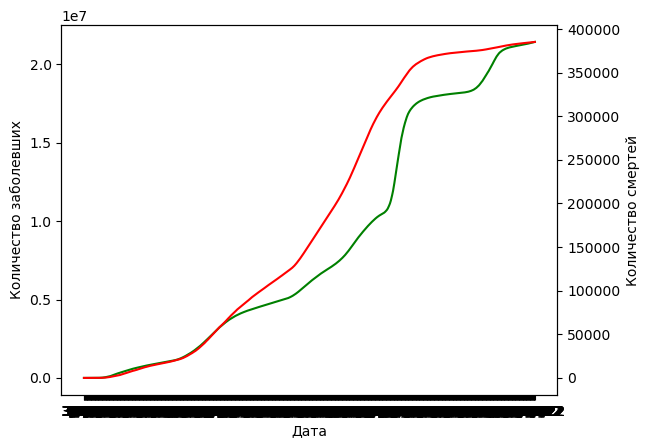

In [26]:
# Строим графики
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df.index,df['Количество заболевших'], color="green")
ax2.plot(df.index,df['Количество смертей'], color="red")

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество заболевших')
ax2.set_ylabel('Количество смертей')

plt.show()